<a href="https://colab.research.google.com/github/sksj007/Customer-Churn-Analysis/blob/main/real_time_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas scikit-learn matplotlib tensorflow

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [3]:
def get_stock_data(ticker, period='1mo', interval='1d'):
  stock = yf.Ticker(ticker)
  df = stock.history(period=period, interval=interval)
  return df
ticker = 'AAPL'
df = get_stock_data(ticker)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-27 00:00:00-04:00,198.300003,200.740005,197.429993,200.210007,56288500,0.0,0.0
2025-05-28 00:00:00-04:00,200.589996,202.729996,199.899994,200.419998,45339700,0.0,0.0
2025-05-29 00:00:00-04:00,203.580002,203.809998,198.509995,199.949997,51396800,0.0,0.0
2025-05-30 00:00:00-04:00,199.369995,201.960007,196.779999,200.850006,70819900,0.0,0.0
2025-06-02 00:00:00-04:00,200.279999,202.130005,200.119995,201.699997,35423300,0.0,0.0


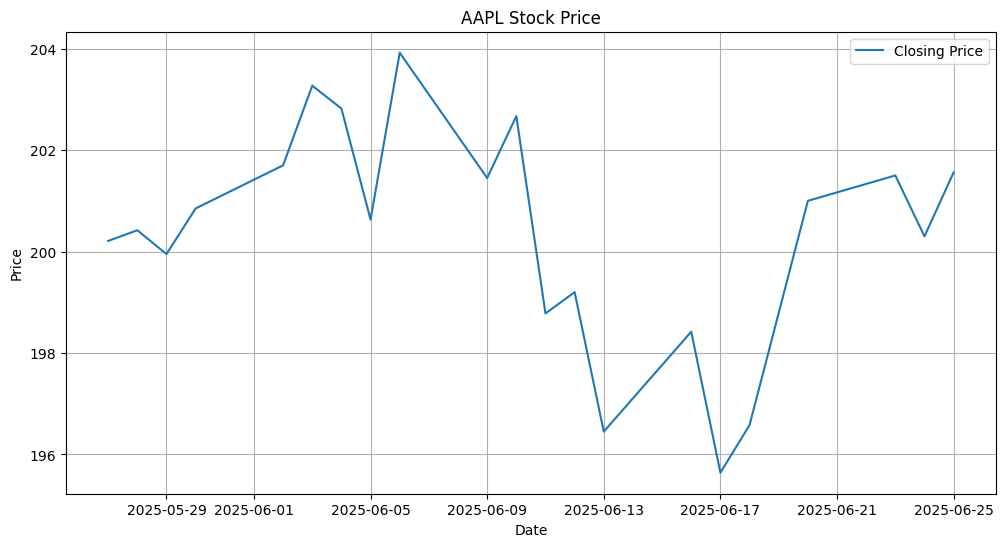

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()



In [5]:
df = df.reset_index(drop=True)
df['Day'] = np.arange(len(df))
X= df[['Day']]
y= df[['Close']]

In [6]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(df[['Close']])

def create_sequences(data, seq_length=5):
  X = []
  y = []
  for i in range(len(data)- seq_length):
    X.append(data[i:i + seq_length])
    y.append(data[i + seq_length])
  return np.array(X), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_prices, seq_length)

In [7]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
X = X.reshape((X.shape[0], X.shape[1], 1))
history = model.fit(X,y, epochs=50, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4166
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.4048
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 0.3932
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.3819
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.3709
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.3601
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.3495
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.3391
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.3287
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.3187
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.3087
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2988
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.2890
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 0.2792
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.2694
Epoch 16/50
1/1 ━━━━━━━━

In [9]:
last_sequence = scaled_prices[-seq_length:]
future_predictions =[]
current_seq = last_sequence.reshape((1, seq_length, 1))
for _ in range(5):
  next_price = model.predict(current_seq)[0][0]
  future_predictions.append(next_price)
  current_seq = np.append(current_seq[:, 1:, :], [[[next_price]]], axis=1)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


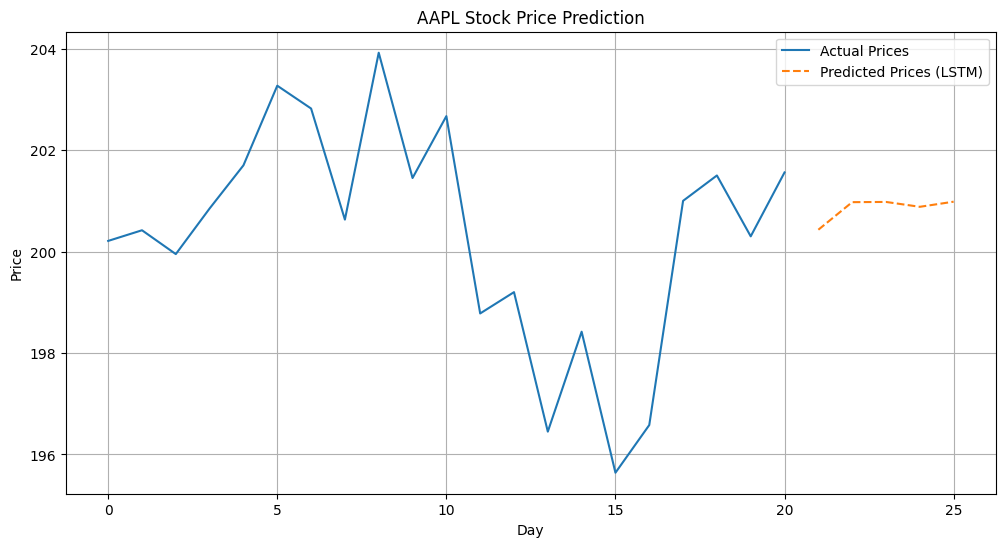

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Prices')
plt.plot(range(len(df), len(df)+ 5), future_predictions, label='Predicted Prices (LSTM)', linestyle='--')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.grid()
plt.show()